In [4]:

data_dir ="/home/tarkus/Desktop/WILDS/paper_2022/train_classifiers/DomainBed/features"

# Directory of Model weights
model_dir = data_dir

In [99]:
from competence_estimation.metrics import compute_metric
import time

import pickle
results =  {}
results_scores = {}
with open('results/results.pickle', 'rb') as handle:
    results = pickle.load(handle)
    
with open('results/results_scores.pickle', 'rb') as handle:
    results_scores = pickle.load(handle)
print('keys' ,  results.keys())

datasets = [ 'PACS','OfficeHome','TerraIncognita', 'VLCS']
algorithms=['ERM']

score_functions=['energy',  'knn', 'max_softmax']

percentages = [0.0,  0.1, 0.2]


ENVS_DIC = {'OfficeHome':4, 'VLCS':4, 'PACS': 4, 'TerraIncognita': 4, 'SVIRO':10, 'DomainNet': 6}


keys dict_keys(['energy', 'knn', 'max_softmax', 'vim'])


In [78]:
##

In [86]:
import seaborn as sns
import pandas as pd
%matplotlib inline


d = {}

d['score_function'] = []
d['dataset'] = []
d['algorithm'] = []
d['test_domain'] = []
d['acc_drop']  = []
d['percentage'] = []
p=0.0

for k in  results[score_function_name][dataset][algorithm][test_domain][p].keys():
    d[k] = []
    print(k)

d['ausc_alpha_ood_shifted_mean'] = []#.append(result['ausc_alpha_ood_test_shifted'])
d['ausc_fracs_shifted_mean'] = []#.append(result['ausc_fracs_ood_test_shifted'])

d['ausc_ece_ood_alpha_shifted_mean'] = []#.append(result['ausc_alpha_ece_ood_test_shifted'])
d['ausc_ece_ood_fracs_shifted_mean'] = []#.append(

for p in percentages:

    for dataset in datasets:
        for test_domain in  range(ENVS_DIC[dataset]):
            
            mean_fracs = 0
            mean_alpha = 0
            mean_ece = 0
            mean_ece_fracs = 0

            for algorithm in algorithms:
                
                for score_function_name in score_functions:
                    
                    result = results[score_function_name][dataset][algorithm][test_domain][p]#(results[conf_key][score_function][dataset][alg_cons][test_domain][p]

                    d['dataset'].append(dataset)
                    d['algorithm'].append(algorithm)
                    d['test_domain'].append(test_domain)

                    d['percentage'].append(p)
                    
                    d['score_function'].append(score_function_name)
                    for k in  results[score_function_name][dataset][algorithm][test_domain][p].keys():
                        d[k].append(result[k])
             
                    d['acc_drop'].append(result['acc_ood_test']-result['acc_iid_test'] )
                    
                    mean_alpha += d['ausc_alpha_ood_test_shifted'][-1]
                    mean_ece += d['ausc_alpha_ece_ood_test_shifted'][-1]
                    mean_fracs += d['ausc_fracs_ood_test_shifted'][-1]
                    mean_ece_fracs += d['ausc_fracs_ece_ood_test_shifted'][-1]

                    d['ausc_alpha_ood_shifted_mean'].append(result['ausc_alpha_ood_test_shifted'])
                    d['ausc_fracs_shifted_mean'].append(result['ausc_fracs_ood_test_shifted'])

                    d['ausc_ece_ood_alpha_shifted_mean'].append(result['ausc_alpha_ece_ood_test_shifted'])
                    d['ausc_ece_ood_fracs_shifted_mean'].append(result['ausc_fracs_ece_ood_test_shifted'])

                mean_alpha /=len(score_functions)
                mean_ece /=len(score_functions)
                mean_fracs /=len(score_functions)
                mean_ece_fracs /= len(score_functions)
                for e, _ in enumerate(score_functions):
                    d['ausc_alpha_ood_shifted_mean'][-e-1] -= mean_alpha
                    d['ausc_ece_ood_alpha_shifted_mean'][-e-1] -= mean_ece
                    d['ausc_fracs_shifted_mean'][-e-1] -= mean_fracs
                    d['ausc_ece_ood_fracs_shifted_mean'][-e-1] -= mean_ece_fracs

            #print(mean)    
            
df = pd.DataFrame(data=d)
print(len(df))

acc_ood_test
acc_iid_test
acc_iid_val
ece_ood_test
ece_iid_test
ece_iid_val
ausc_alpha_ece_ood_test
ausc_alpha_ece_iid_test
ausc_alpha_ece_ood_test_shifted
ausc_alpha_ece_iid_test_shifted
ausc_fracs_ece_ood_test
ausc_fracs_ece_iid_test
ausc_fracs_ece_ood_test_shifted
ausc_fracs_ece_iid_test_shifted
ausc_alpha_ood_test
ausc_alpha_iid_test
ausc_alpha_ood_test_shifted
ausc_alpha_iid_test_shifted
ausc_fracs_ood_test
ausc_fracs_iid_test
ausc_fracs_ood_test_shifted
ausc_fracs_iid_test_shifted
intersection_fraction_ood_test
intersection_alpha_ood_test
intersection_fraction_iid_test
intersection_alpha_iid_test
frac_remaining_ood_test
frac_remaining_iid_test
144


In [83]:
#df_save = df[['dataset', 'algorithm',  'percentage', 'algorithm', 'score_function','ausc_alpha_ood_shifted','ausc_fracs_shifted', 'ausc_ece_ood_alpha_shifted','ausc_ece_ood_fracs_shifted'   ]]
#df_save.to_csv('results_percentage.csv', index=False)

In [68]:
#pd.read_csv('results_percentage.csv')

In [ ]:
# ANOVA Stuff
results = {}



import pickle
with open('results_percentage_erm.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
np.arange(np.array([0.0,0.1]))
print(percentages)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# AUSC Alpha

Text(0.5, 1.0, 'AUSC')

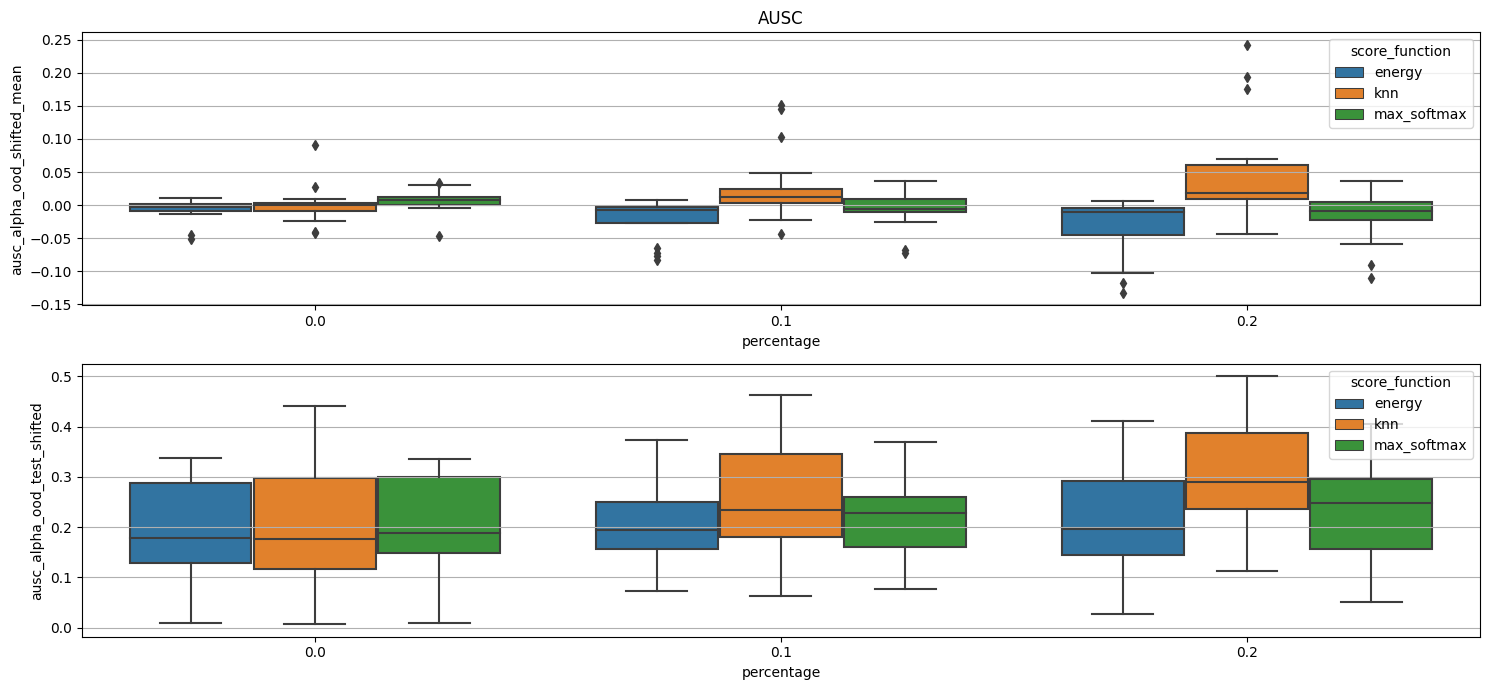

In [84]:
fig, ax = plt.subplots(2, 1,
    figsize =(15, 7),
    tight_layout = True)
#df = df[df['algorithm'] == 'ERM']

sns.boxplot(data=df, x="percentage", y="ausc_alpha_ood_shifted_mean", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')
#ax[0].plot(np.array(percentages), np.array(percentages)+0.15 )
sns.boxplot(data=df, x="percentage", y="ausc_alpha_ood_test_shifted", hue='score_function', ax=ax[1])
ax[1].grid(axis='y')

#sns.boxplot(data=df, x="percentage", y="ausc_alpha_ood_test", hue='score_function', ax=ax[2])


ax[0].set_title("AUSC")

### AUSC Fracs

Text(0.5, 1.0, 'AUSC')

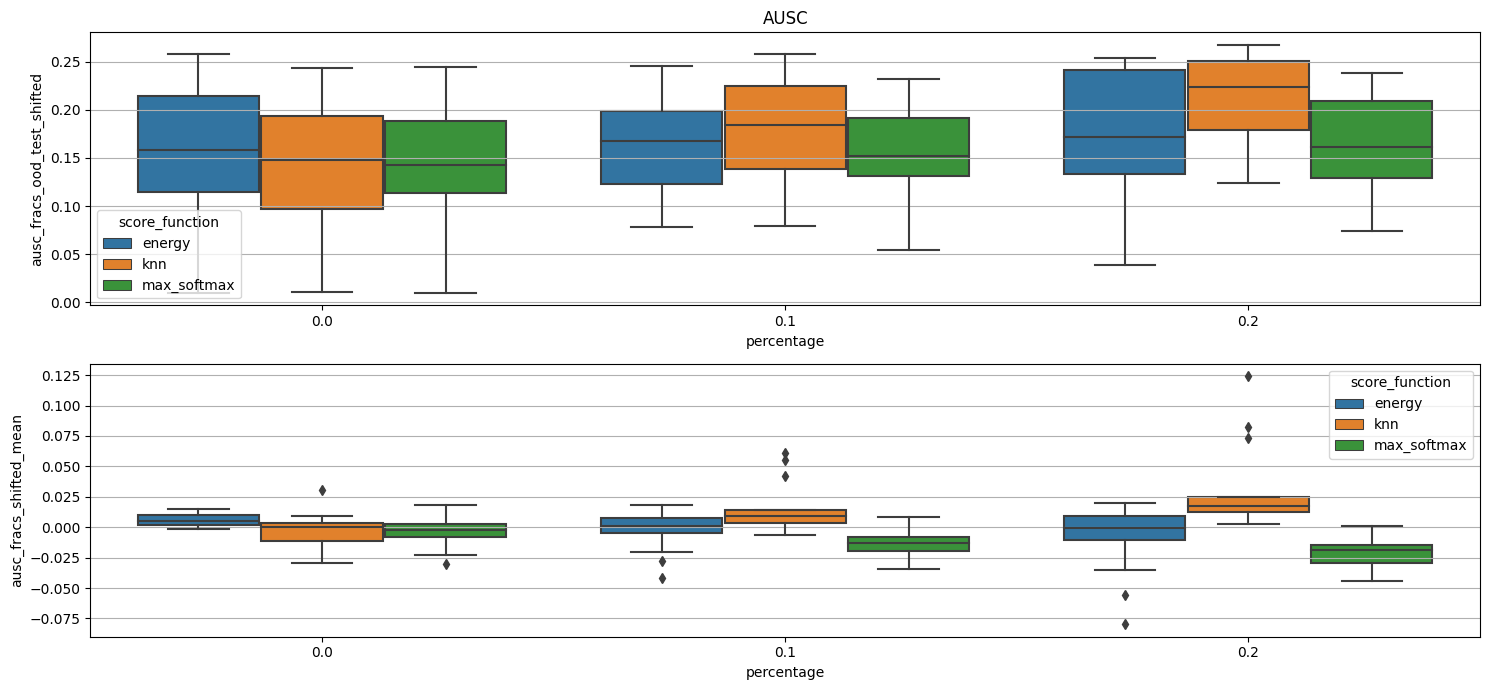

In [90]:
fig, ax = plt.subplots(2, 1,
    figsize =(15, 7),
    tight_layout = True)
sns.boxplot(data=df, x="percentage", y="ausc_fracs_ood_test_shifted", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')
#ax[0].plot(np.array, np.array(percentages)+0.15 )
sns.boxplot(data=df, x="percentage", y="ausc_fracs_shifted_mean", hue='score_function', ax=ax[1])
ax[1].grid(axis='y')

#sns.boxplot(data=df, x="percentage", y="ausc_fracs_ood_test", hue='score_function', ax=ax[2])

ax[0].set_title("AUSC")

## ECE Alpha

Text(0.5, 1.0, 'AUSC')

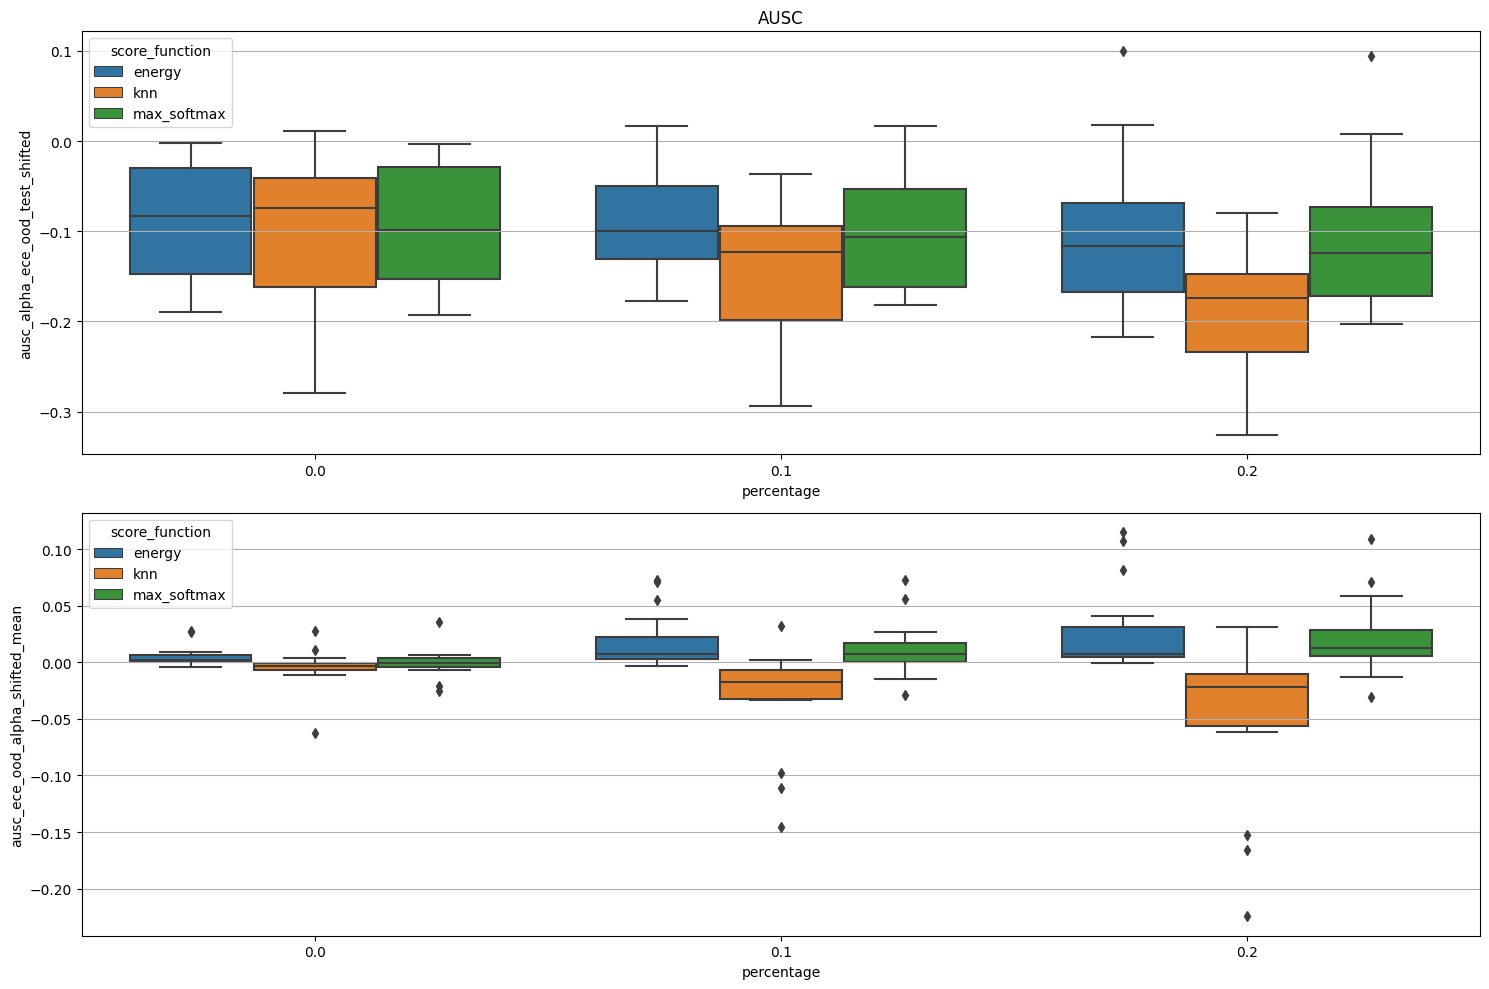

In [94]:
fig, ax = plt.subplots(2, 1,
    figsize =(15, 10),
    tight_layout = True)

sns.boxplot(data=df, x="percentage", y="ausc_alpha_ece_ood_test_shifted", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')
#ax[0].plot([0,1,2,3,4,5], np.array(percentages)+0.15 )
sns.boxplot(data=df, x="percentage", y="ausc_ece_ood_alpha_shifted_mean", hue='score_function', ax=ax[1])

ax[1].grid(axis='y')

ax[0].set_title("AUSC")

## ECE Fracs

Text(0.5, 1.0, 'AUSC')

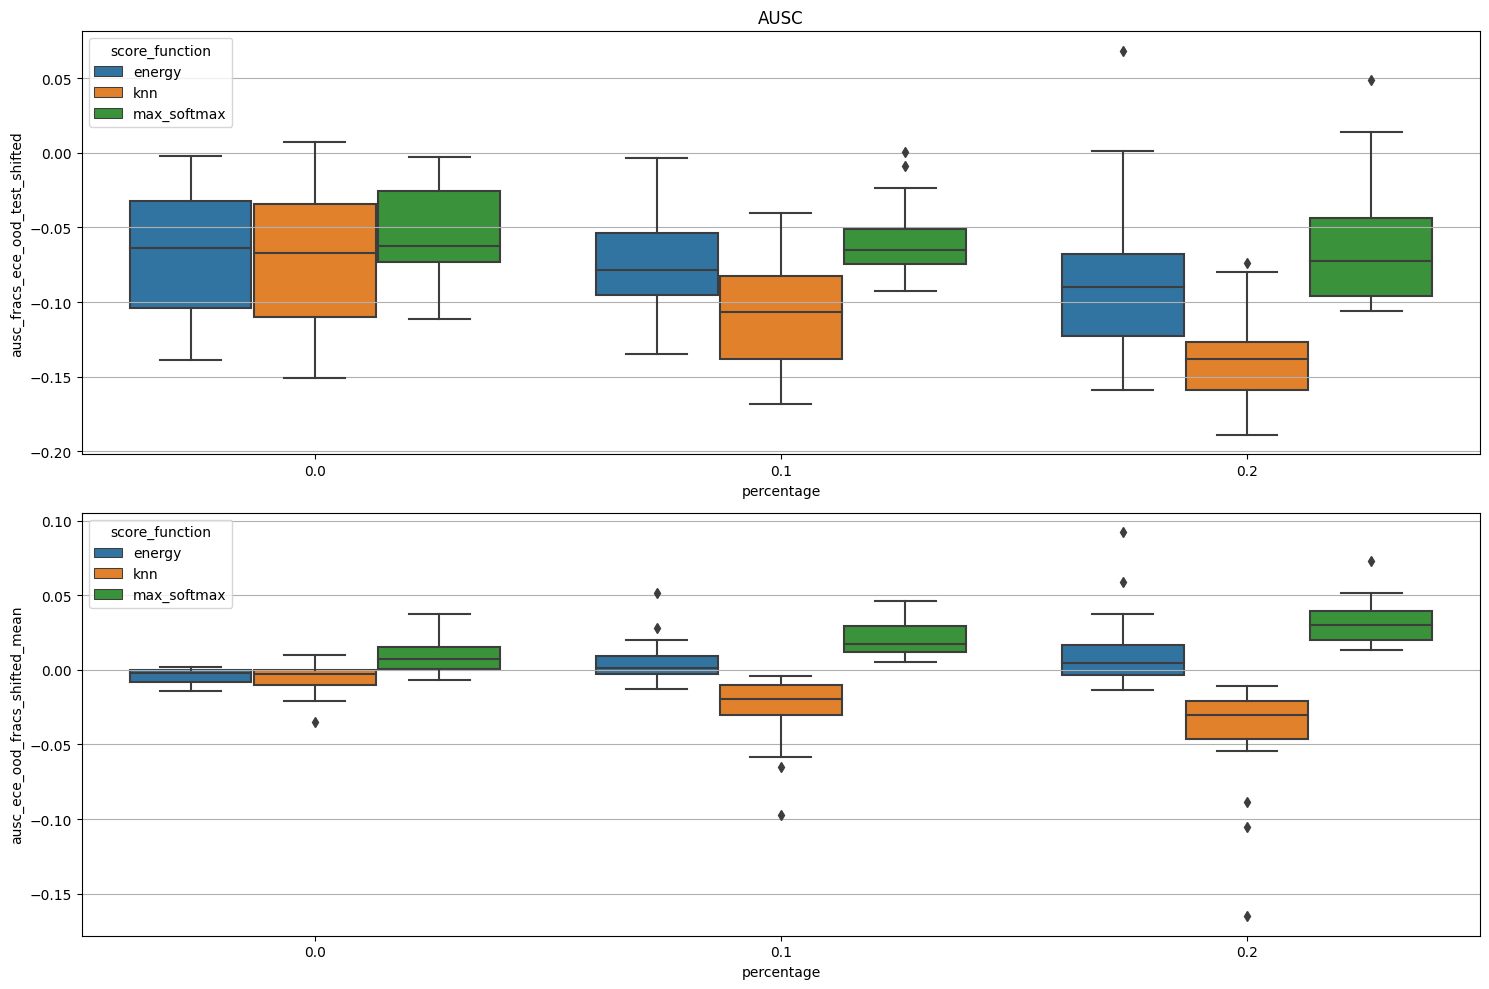

In [96]:
fig, ax = plt.subplots(2, 1,
    figsize =(15, 10),
    tight_layout = True)

sns.boxplot(data=df, x="percentage", y="ausc_fracs_ece_ood_test_shifted", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')
#ax[0].plot([0,1,2,3,4,5], np.array(percentages)+0.15 )
sns.boxplot(data=df, x="percentage", y="ausc_ece_ood_fracs_shifted_mean", hue='score_function', ax=ax[1])

ax[1].grid(axis='y')

ax[0].set_title("AUSC")

#  Fraacs Remaining

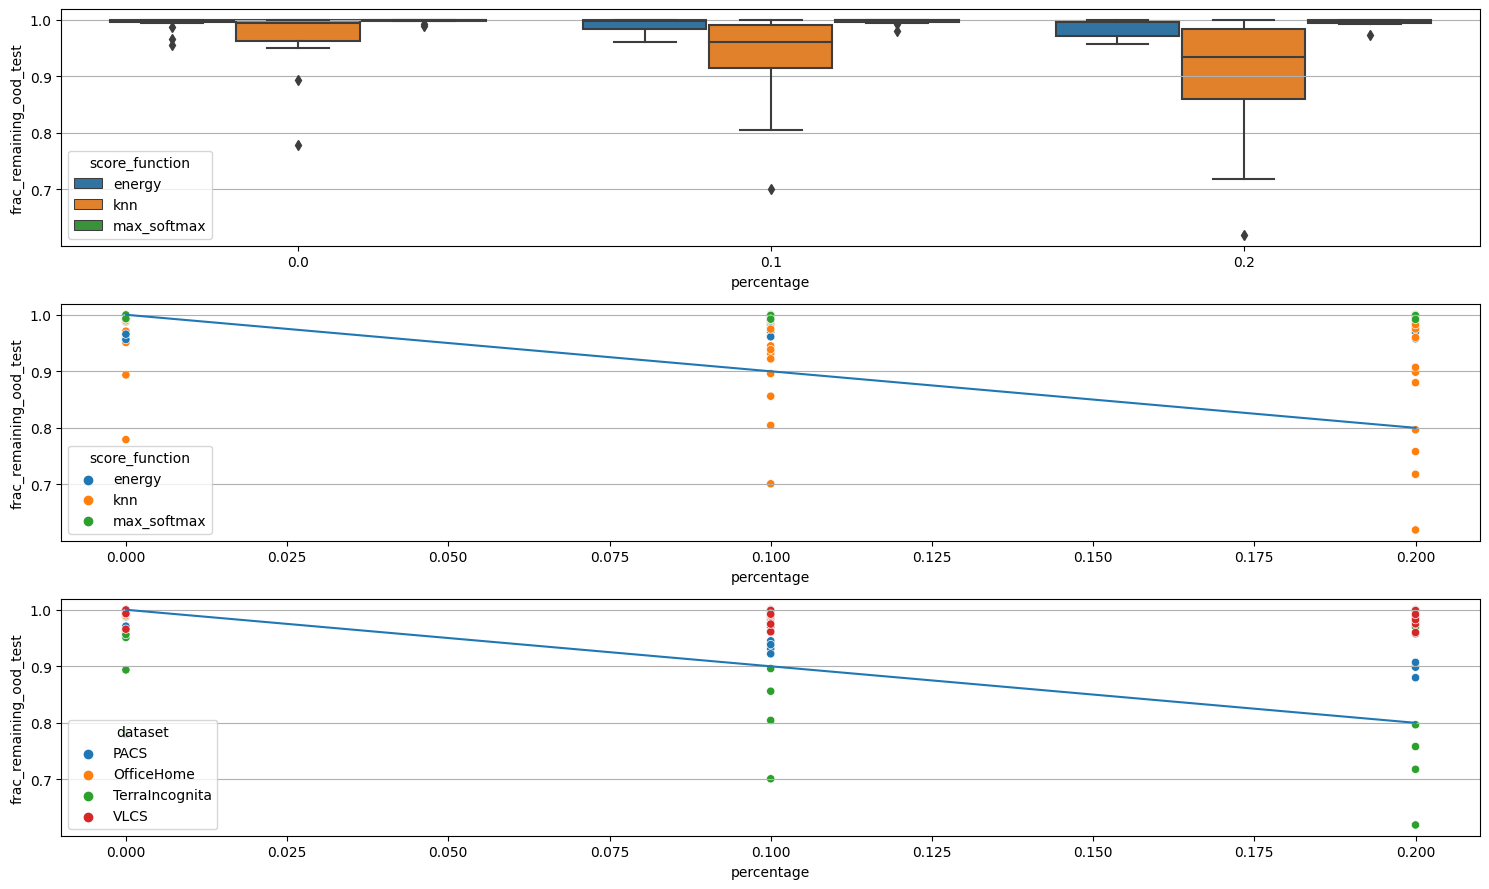

In [97]:
fig, ax = plt.subplots(3, 1,
    figsize =(15, 9),
    tight_layout = True)

sns.boxplot(data=df, x="percentage", y="frac_remaining_ood_test", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')

sns.scatterplot(data=df, x="percentage", y="frac_remaining_ood_test", hue='score_function', ax=ax[1])
ax[1].plot(percentages, 1-np.array(percentages))
ax[1].grid(axis='y')

sns.scatterplot(data=df, x="percentage", y="frac_remaining_ood_test", hue='dataset', ax=ax[2])
ax[2].plot(percentages, 1-np.array(percentages))
ax[2].grid(axis='y')

# Histogram  Plots:  IID vs. OOD vs. Open-World

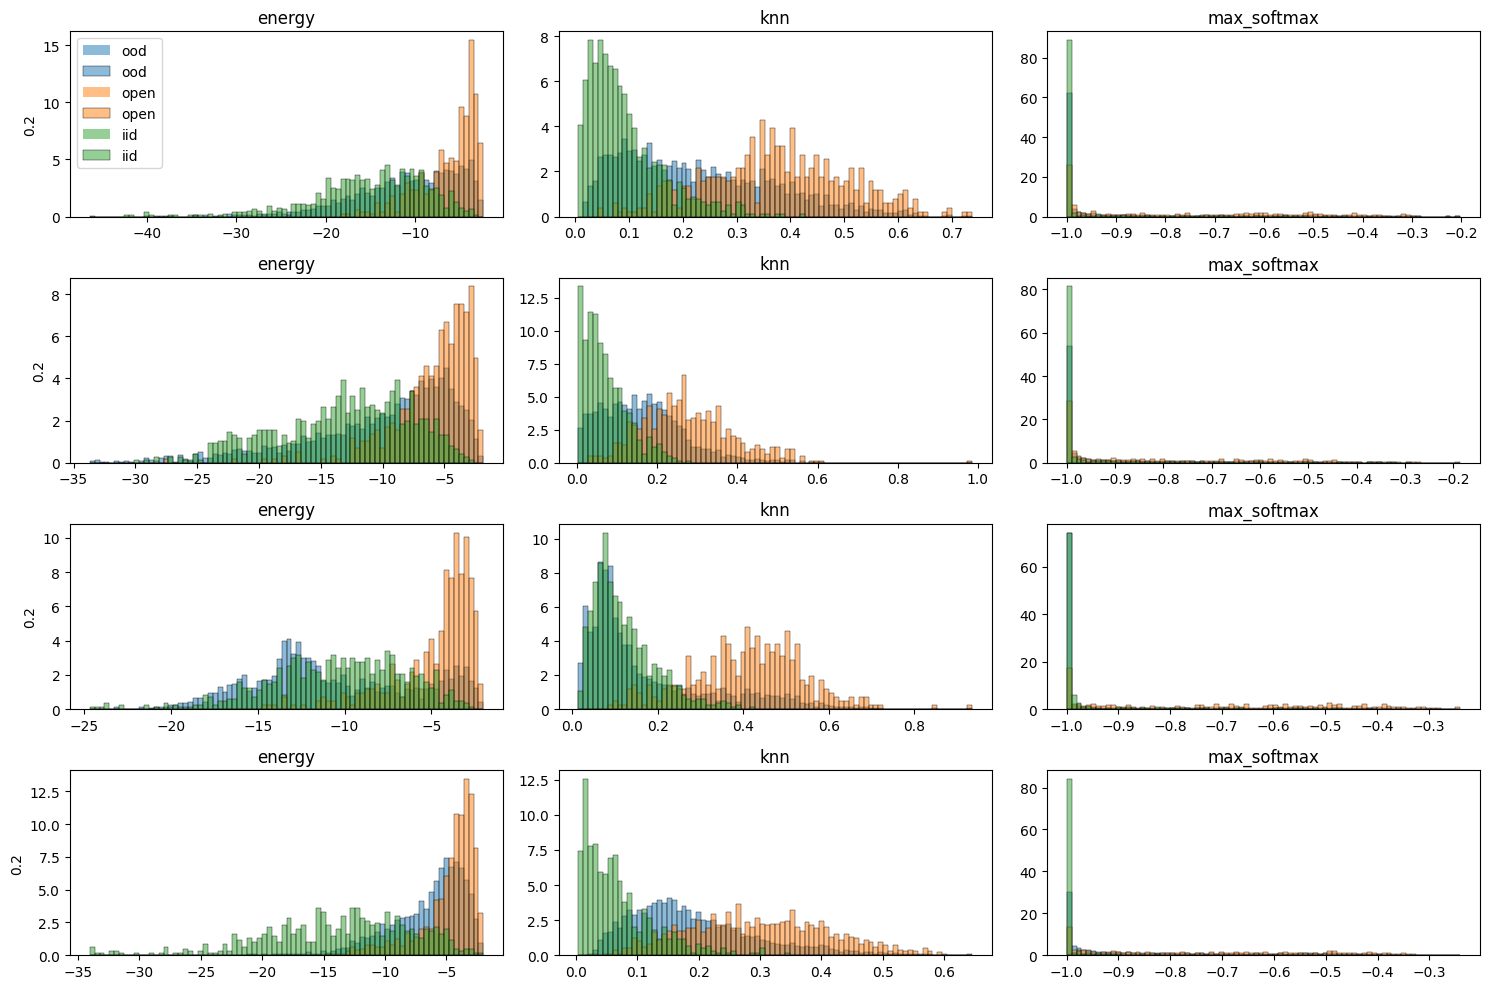

In [113]:
from competence_estimation.metrics import compute_curves
fig, ax = plt.subplots(4, len(score_functions),
    figsize =(15, 10),
    tight_layout = True)

test_domain = 0
dataset='PACS'
algorithm = 'ERM'

for test_domain in range(4):

    for ep, p in  enumerate([0.2]):
        for ec, score_function_name in enumerate(score_functions):

            result = results_scores[score_function_name][dataset][algorithm][test_domain][p]
            scores_ood = result['scores_ood_test']
            scores_iid =  result['scores_iid_val']

            n  = scores_ood.shape[0]-  int(p * scores_ood.shape[0])

            bins=np.histogram(np.hstack((scores_ood,scores_iid)), bins=80)[1] #get the bin edges

            sns.histplot(scores_ood,  ax=ax[test_domain,ec], alpha=0.5, stat='percent', label='ood',  bins=bins)
            sns.histplot(scores_ood[n:],  ax=ax[test_domain,ec], alpha=0.5, stat='percent', label='open', bins=bins)

            sns.histplot(scores_iid,  ax=ax[test_domain,ec], alpha=0.5, stat='percent', label='iid',  bins=bins)
            #ax[ep,ec].axvline(scores_ood.mean())        
            ax[ep,ec].grid()

            if  ep  == 0:
                ax[test_domain,ec].set_title(score_function_name)
            if ec ==  0:
                ax[test_domain, ec].set_ylabel(str(p))
            else:
                ax[test_domain, ec].set_ylabel("")


ax[0,0].legend()

# Histogram  in OOD data:  Correct vs.  Incorrect vs. Open World

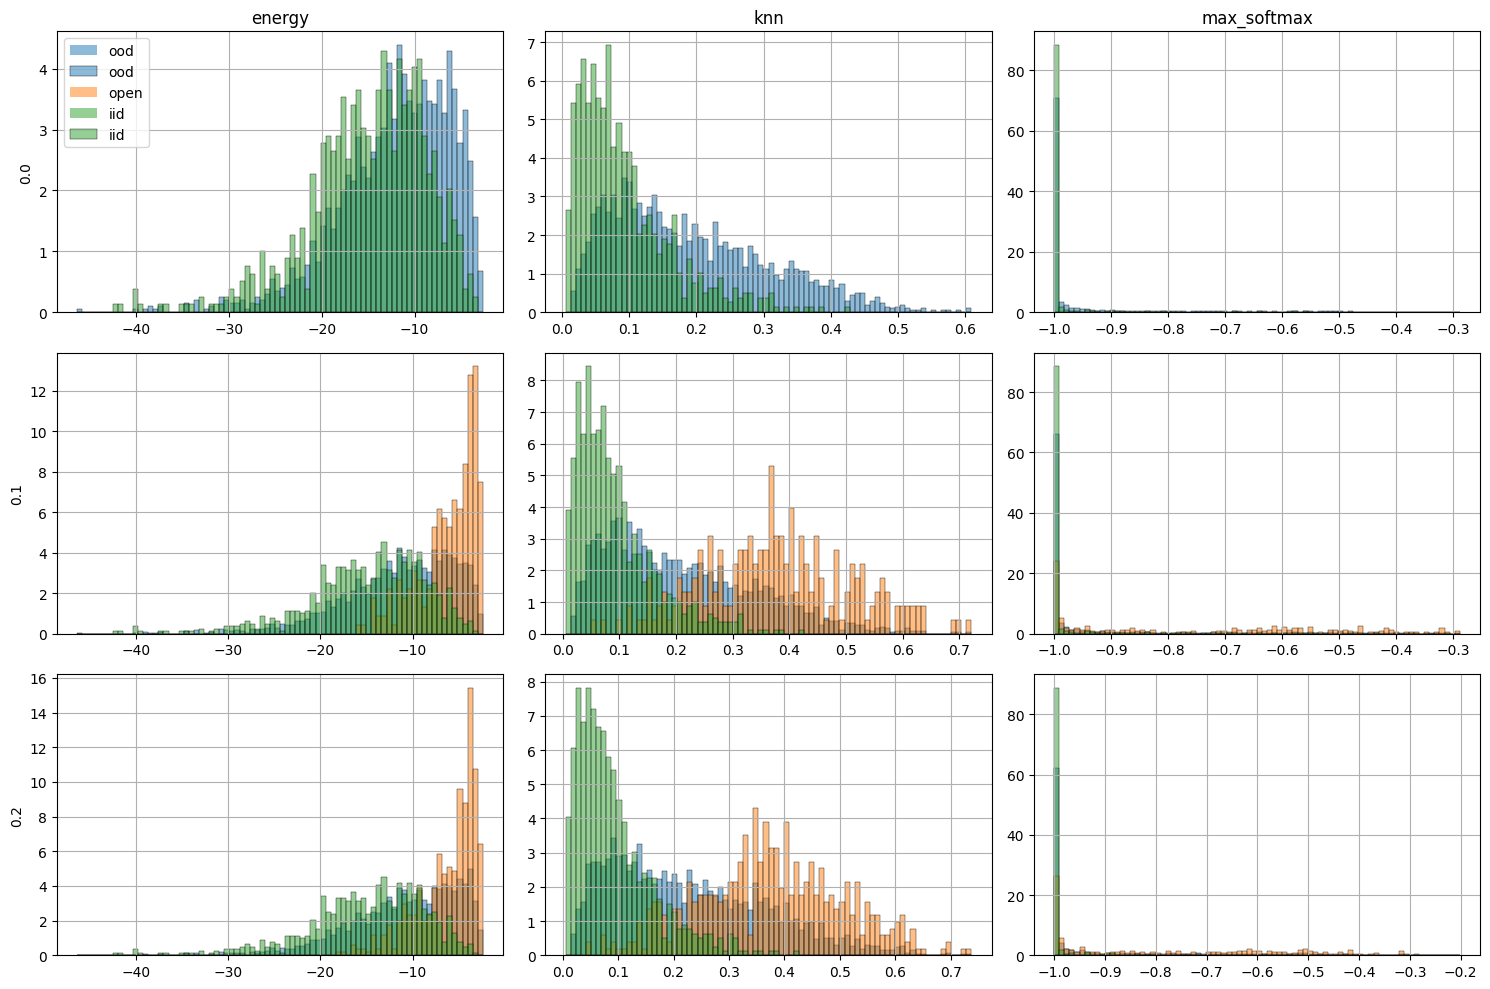

In [114]:
from competence_estimation.metrics import compute_curves
fig, ax = plt.subplots(len(percentages), len(score_functions),
    figsize =(15, 10),
    tight_layout = True)

test_domain = 0
dataset='PACS'
algorithm = 'ERM'

for ep, p in  enumerate(percentages):
    for ec, score_function_name in enumerate(score_functions):

        result = results_scores[score_function_name][dataset][algorithm][test_domain][p]
        scores_ood = result['scores_ood_test']
        scores_iid =  result['scores_iid_val']
        
        n  = scores_ood.shape[0]-  int(p * scores_ood.shape[0])
        
        
        iid_train, iid_val, iid_test, ood_test = load_data(
            algorithm, dataset, test_domain, data_dir, fast=False
        )


        
        bins=np.histogram(np.hstack((scores_ood,scores_iid)), bins=80)[1] #get the bin edges

        sns.histplot(scores_ood,  ax=ax[ep,ec], alpha=0.5, stat='percent', label='ood',  bins=bins)
        sns.histplot(scores_ood[n:],  ax=ax[ep,ec], alpha=0.5, stat='percent', label='open', bins=bins)

        sns.histplot(scores_iid,  ax=ax[ep,ec], alpha=0.5, stat='percent', label='iid',  bins=bins)
        #ax[ep,ec].axvline(scores_ood.mean())        
        ax[ep,ec].grid()
        
        if  ep  == 0:
            ax[ep,ec].set_title(score_function_name)
        if ec ==  0:
            ax[ep, ec].set_ylabel(str(p))
        else:
            ax[ep, ec].set_ylabel("")

        
ax[0,0].legend()

## G (alpha)

In [29]:
def mix_open(features_ood, logits_ood, features_open, logits_open, percentage=0.5):
    n = features_ood.shape[0]
    n_open= int(n*percentage / (1-percentage))#int(n*percentage)
    if n_open <= features_open.shape[0]:
        pass
        #print(f"Only {n_open/n} achieved ")
    else:
        n = int(features_open.shape[0]* ((1-percentage)/percentage))
        #n=500
        #n=100
        
    idx = torch.randperm(features_open.shape[0])
    features_open = features_open[idx]
    #print(n, n_open, features_open.shape)
    features_out = np.concatenate( ( features_ood[:n], features_open[:n_open]))
    logits_out = np.concatenate( (logits_ood[:n], logits_open[:n_open]))
    labels_out = torch.cat((ood_test[2][:n], torch.ones(logits_open[:n_open].shape[0]) -2), 0)

    return features_out, logits_out, labels_out
    

{'score_fct': 'knn', 'K': 1}
{'score_fct': 'knn', 'K': 50}
{'score_fct': 'max_softmax'}
{'score_fct': 'max_logit'}


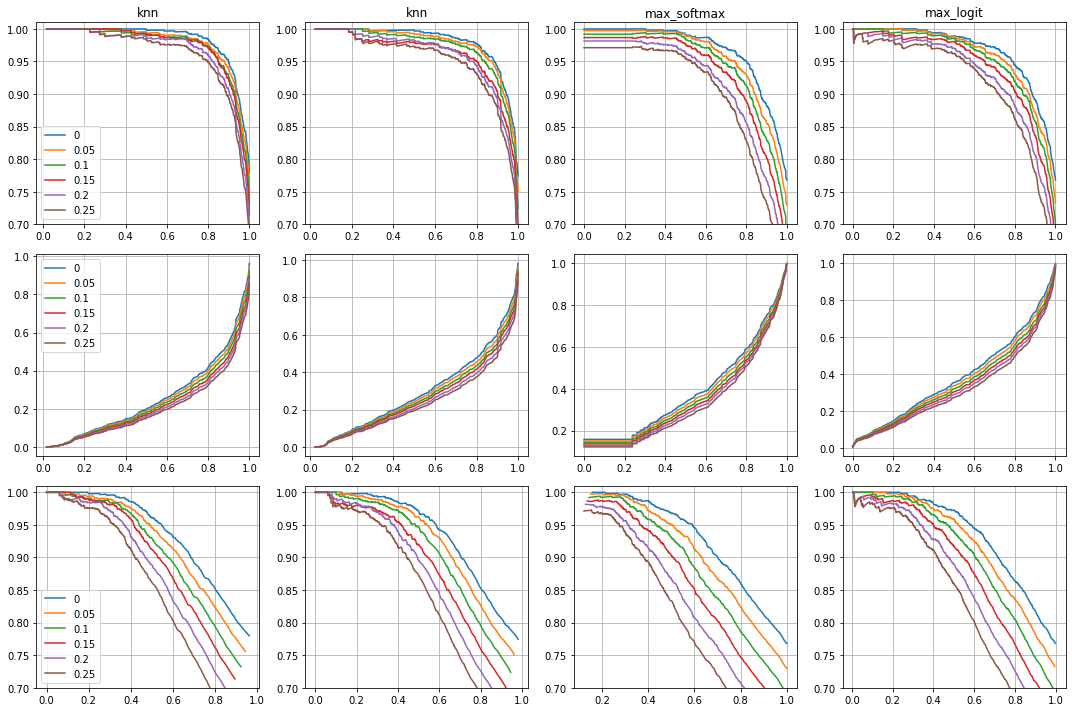

In [30]:
from metrics import compute_curves
from sklearn.metrics import auc

fig, ax = plt.subplots(3, len(configs),
    figsize =(15, 10),
    tight_layout = True)

dataset = 'PACS'
test_domain = 1
p=0.0#25
#score_function = 'max_softmax'
for e,  conf  in enumerate(configs):
    print(conf)
    conf_key = myHash(str(list(conf.values())))
    score_function = conf['score_fct']
    #labels_open = torch.from_numpy(np.load(data_dir +'/'+dataset+'/' + f"test_env_{test_domain}/{alg_cons}_labels_open_world.npy"))

    iid_train, iid_val, iid_test, ood_test = load_data(alg_cons, dataset, test_domain, data_dir, fast=False)
    #print((labels_open).view(-1).unique())
    features_open = np.load(data_dir +'/'+dataset+'/' + f"test_env_{test_domain}/{alg_cons}_features_open_world.npy")
    logits_open = np.load(data_dir +'/'+dataset+'/' + f"test_env_{test_domain}/{alg_cons}_logits_open_world.npy")
    ax[0, e].set_title(score_function)
    ax[1,e].grid()
    ax[0,e].grid()
    ax[2,e].grid()

    for p in percentages:
        features_out, logits_out, labels_out = mix_open(ood_test[0], ood_test[1], features_open, logits_open, percentage=p)
        features_out = torch.tensor(features_out)
        logits_out = torch.tensor(logits_out)

        scores_iid = results_scores[conf_key][score_function][p][dataset][alg_cons][test_domain]['scores_iid_val']
        scores_ood  = results_scores[conf_key][score_function][p][dataset][alg_cons][test_domain]['scores_ood_test']

        #sns.histplot(scores_ood[labels_out!=-1], alpha=0.5, label='ood', bins=120, stat='percent', ax=ax[0, e])
        #sns.histplot(scores_ood[labels_out==-1], alpha=0.5, label='open', bins=120, stat='percent', ax=ax[0, e])

        x_axis, metric_alpha, fracs =compute_curves(scores_iid, scores_ood,  logits_out, labels_out,num_alphas=1000, alpha_start=0.000,alpha_end=1.0, metric='acc')
        #print(len(x_axis))
        ax[0,e].plot(x_axis, metric_alpha, label=p)
        ax[1,e].plot(x_axis, fracs, label=p)
        ax[2, e].plot(fracs, metric_alpha, label=p)
        ax[0,e].set_ylim(0.7, 1.01)
        ax[2,e].set_ylim(0.7, 1.01)


        #print(score_function, auc(x_axis, metric_alpha), fracs[0], fracs[-1])
ax[1,0].legend()
ax[2,0].legend()
ax[0,0].legend()


# Which iid feature is  predictive?

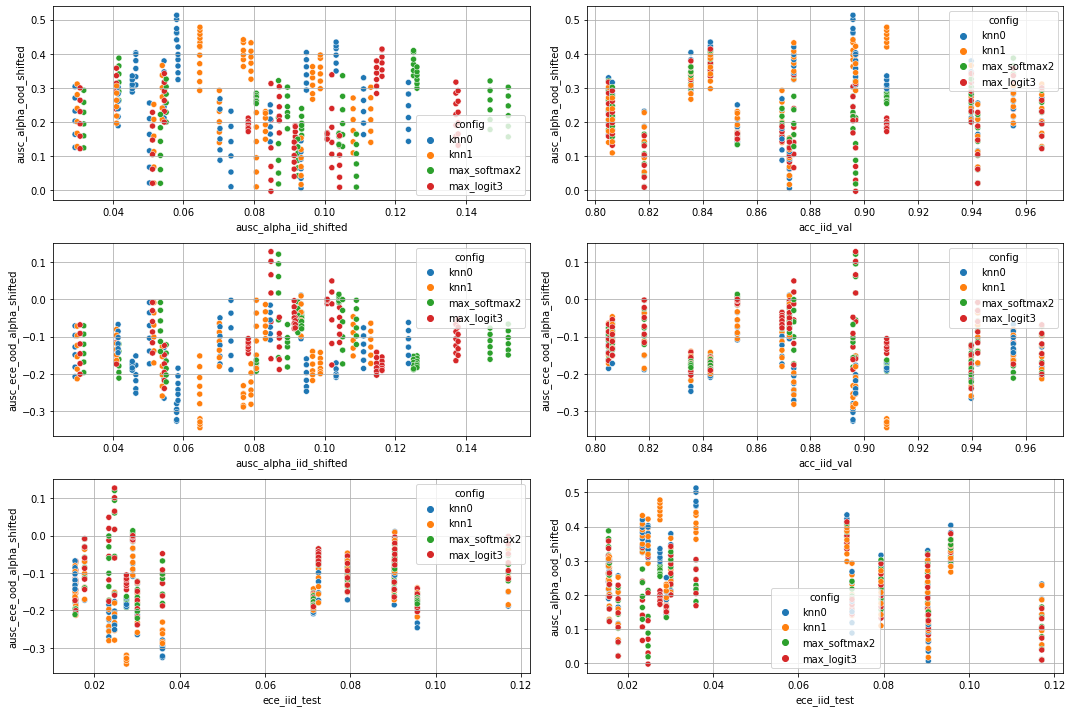

In [31]:
fig, ax = plt.subplots(3, 2,
    figsize =(15, 10),
    tight_layout = True)

df= df[df['config']!='mahalanobis6']

sns.scatterplot(x="ausc_alpha_iid_shifted", y="ausc_alpha_ood_shifted",data=df,  ax=ax[0,0], hue='config')
ax[0,0].grid()
sns.scatterplot(x="acc_iid_val", y="ausc_alpha_ood_shifted",data=df,  ax=ax[0,1], hue='config')
ax[0,1].grid()


sns.scatterplot(x="ausc_alpha_iid_shifted", y="ausc_ece_ood_alpha_shifted",data=df,  ax=ax[1,0], hue='config')
ax[1,0].grid()
sns.scatterplot(x="acc_iid_val", y="ausc_ece_ood_alpha_shifted",data=df,  ax=ax[1,1], hue='config')
ax[1,1].grid()


sns.scatterplot(x="ece_iid_test", y="ausc_ece_ood_alpha_shifted",data=df,  ax=ax[2,0], hue='config')
ax[2,0].grid()
sns.scatterplot(x="ece_iid_test", y="ausc_alpha_ood_shifted",data=df,  ax=ax[2,1], hue='config')
ax[2,1].grid()

In [ ]:
# 